In [782]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = "~/Desktop/portfolio/Portfolio/07_Marriage_Over_Time/ms1.xls"


df = pd.read_excel(data, header = 9)

df.drop([0,1], axis = 0, inplace=True)
df.drop([df.columns[3],df.columns[8], df.columns[11], 
         df.columns[1], df.columns[2], df.columns[9], 
         df.columns[10]], axis = 1, inplace=True)


df.rename(columns = {"Year":'year', "Total.1":"m_total", "married":"m_married",
           "Widowed":"m_widowed", "Divorced":"m_divorced", 
           "Total.3":"f_total", "married.1":"f_married",
           "Widowed.1":"f_widowed", "Divorced.1":"f_divorced"}, 
          inplace=True)
df.reset_index(inplace=True)
df.drop(columns = 'index', inplace=True)
df.head()

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0


In [783]:
df['tot_pop'] = df['m_total'] + df["f_total"]

In [784]:
df['tot_married'] = df['m_married'] + df['f_married']

In [785]:
df['tot_widowed'] = df['m_widowed'] + df['f_widowed']

In [786]:
df['tot_divorced'] = df['m_divorced'] + df['f_divorced']

In [787]:
df.count()

year            238
m_total         221
m_married       221
m_widowed       221
m_divorced      221
f_total         221
f_married       221
f_widowed       221
f_divorced      221
tot_pop         221
tot_married     221
tot_widowed     221
tot_divorced    221
dtype: int64

In [788]:
df.isna().sum()

year            16
m_total         33
m_married       33
m_widowed       33
m_divorced      33
f_total         33
f_married       33
f_widowed       33
f_divorced      33
tot_pop         33
tot_married     33
tot_widowed     33
tot_divorced    33
dtype: int64

In [789]:
df.isnull().sum()

year            16
m_total         33
m_married       33
m_widowed       33
m_divorced      33
f_total         33
f_married       33
f_widowed       33
f_divorced      33
tot_pop         33
tot_married     33
tot_widowed     33
tot_divorced    33
dtype: int64

In [790]:
df.iloc[[146]]

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced
146,.Asian2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
# df.dropna(inplace=True)

In [792]:
df.count()

year            238
m_total         221
m_married       221
m_widowed       221
m_divorced      221
f_total         221
f_married       221
f_widowed       221
f_divorced      221
tot_pop         221
tot_married     221
tot_widowed     221
tot_divorced    221
dtype: int64

In [793]:
df['pct_married'] = round(100*df['tot_married']/df['tot_pop'],2)

df['pct_widowed'] = round(100*df['tot_widowed']/df['tot_pop'],2)

df['pct_divorced'] = round(100*df['tot_widowed']/df['tot_pop'],2)

In [794]:
df

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.10,12.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,FOR FURTHER INFORMATION contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Fertility and Family Statistics Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,301-763-2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [795]:
df.isna().sum()

year            16
m_total         33
m_married       33
m_widowed       33
m_divorced      33
f_total         33
f_married       33
f_widowed       33
f_divorced      33
tot_pop         33
tot_married     33
tot_widowed     33
tot_divorced    33
pct_married     33
pct_widowed     33
pct_divorced    33
dtype: int64

In [796]:
df.fillna("",inplace=True)

In [797]:
df.isna().sum()

year            0
m_total         0
m_married       0
m_widowed       0
m_divorced      0
f_total         0
f_married       0
f_widowed       0
f_divorced      0
tot_pop         0
tot_married     0
tot_widowed     0
tot_divorced    0
pct_married     0
pct_widowed     0
pct_divorced    0
dtype: int64

In [798]:
df.head()

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced
0,..2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66
1,..2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62
2,..2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84
3,..2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02
4,..2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1


In [799]:
race = ['All races', 'White', 'Black', 'Asian', 'Hispanic']
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
nums = '0123456789'
new_year = ''

remove_i = []

# itterate over DF
for i in range(len(df)):
    new_year = ""
    
# itterate over race array
    if len(df.iloc[i,0]) < 1:
        remove_i.append(i)
    else:
        for el in race:
            #if race is a substring of the current cell value 
            if el in df.iloc[i,0]:
                #replace the cell with the array element
                df.iloc[i,0] = el
                
        #itterate over each character of current cell value
        for k in df.iloc[i,0]:

        #if char is a punctuation replace with empty str
            if (k in punc):
                df.iloc[i,0] = df.iloc[i,0].replace(k,"")
                
            if str(k) in nums:
                new_year += str(k)

        if len(new_year) == 4:
            df.iloc[i,0] = int(new_year)
            print(new_year)

            

2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1990
1980
1970
1960
1950
2021
2020
2019
2019
2018
2018
2017
2017
2016
2016
2015
2015
2014
2014
2013
2013
2012
2012
2011
2011
2011
2011
2010
2010
2009
2009
2008
2008
2007
2007
2006
2006
2005
2005
2004
2004
2003
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1990
1980
1970
1960
1950
2021
2020
2019
2019
2018
2018
2017
2017
2016
2016
2015
2015
2014
2014
2013
2013
2012
2012
2011
2011
2011
2011
2010
2010
2009
2009
2008
2008
2007
2007
2006
2006
2005
2005
2004
2004
2003
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1990
1980
1970
1960
1950
2021
2020
2019
2019
2018
2018
2017
2017
2016
2016
2015
2015
2014
2014
2013
2013
2012
2012
2011
2011
2011
2011
2010
2010
2009
2009
2008
2008
2007
2007
2006
2006
2005
2005
2004
2004
2003
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1990
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012


In [800]:
remove_i

[35, 90, 145, 196, 229, 231, 232, 238, 239, 240, 241, 242, 244, 246, 248, 252]

In [801]:
df.drop(remove_i, axis=0, inplace=True)

In [802]:
df.iloc[201
        ,0]

2014

In [803]:
df.tail(20)

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced
222,1998,5138.0,4363.0,131.0,644.0,4573.0,3070.0,617.0,886.0,9711.0,7433.0,748.0,1530.0,76.54,7.7,7.7
223,1997,5058.0,4345.0,146.0,567.0,4497.0,3047.0,575.0,875.0,9555.0,7392.0,721.0,1442.0,77.36,7.55,7.55
224,1996,4711.0,4002.0,131.0,578.0,4276.0,2881.0,579.0,816.0,8987.0,6883.0,710.0,1394.0,76.59,7.9,7.9
225,1995,4422.0,3684.0,157.0,581.0,4070.0,2679.0,582.0,809.0,8492.0,6363.0,739.0,1390.0,74.93,8.7,8.7
226,1994,4441.0,3729.0,172.0,540.0,3992.0,2671.0,582.0,739.0,8433.0,6400.0,754.0,1279.0,75.89,8.94,8.94
227,1993,4197.0,3556.0,138.0,503.0,3814.0,2567.0,557.0,690.0,8011.0,6123.0,695.0,1193.0,76.43,8.68,8.68
228,1990,3113.0,2652.0,102.0,359.0,3031.0,2004.0,445.0,582.0,6144.0,4656.0,547.0,941.0,75.78,8.9,8.9
230,Source US Census Bureau Decennial Censuses 19...,,,,,,,,,,,,,,,
233,Note Details may not sum to total due to round...,,,,,,,,,,,,,,,
234,a Householder whose race was reported as onl...,,,,,,,,,,,,,,,


In [804]:
df['race'] = "all_races"

In [805]:
df


,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Asian,,,,,,,,,,,,,,,,all_races
249,FOR FURTHER INFORMATION contact,,,,,,,,,,,,,,,,all_races
250,Fertility and Family Statistics Branch,,,,,,,,,,,,,,,,all_races
251,3017632416,,,,,,,,,,,,,,,,all_races


In [806]:
races = ['Asian', 'Black', 'Hispanic', 'White']

for curr_row in range(len(df)):
    if df.iloc[curr_row,0] in races:
        for curr_col in range(len(df.columns)):
            df.iloc[curr_row,curr_col] = df.iloc[curr_row,0]


    
        

In [807]:
len(df)

238

In [808]:
curr_race = ""
next_race = ""
counter = 0

for curr_row in range(0, 237):
    curr_race = df.iloc[curr_row,16]
    next_race = df.iloc[curr_row + 1,16]
    
    if curr_race != next_race and counter > 1:
        df.iloc[curr_row,16] = curr_race
        print('meeeeeeeee')
        curr_race = next_race
        
    else:
        df.iloc[curr_row,16] = curr_race
        counter += 1
        

meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee
meeeeeeeee


In [809]:
df

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66,all_races
1,2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62,all_races
2,2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84,all_races
3,2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02,all_races
4,2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian,Asian
249,FOR FURTHER INFORMATION contact,,,,,,,,,,,,,,,,all_races
250,Fertility and Family Statistics Branch,,,,,,,,,,,,,,,,all_races
251,3017632416,,,,,,,,,,,,,,,,all_races


In [667]:
df.isnull().sum()

year             0
m_total         11
m_married       11
m_widowed       11
m_divorced      11
f_total         11
f_married       11
f_widowed       11
f_divorced      11
tot_pop         11
tot_married     11
tot_widowed     11
tot_divorced    11
pct_married     11
pct_widowed     11
pct_divorced    11
race             0
dtype: int64

In [655]:
df.count()

year            238
m_total         238
m_married       238
m_widowed       238
m_divorced      238
f_total         238
f_married       238
f_widowed       238
f_divorced      238
tot_pop         238
tot_married     238
tot_widowed     238
tot_divorced    238
pct_married     238
pct_widowed     238
pct_divorced    238
dtype: int64

In [656]:
df.dtypes

year            object
m_total         object
m_married       object
m_widowed       object
m_divorced      object
f_total         object
f_married       object
f_widowed       object
f_divorced      object
tot_pop         object
tot_married     object
tot_widowed     object
tot_divorced    object
pct_married     object
pct_widowed     object
pct_divorced    object
dtype: object

In [170]:
df['pct_married'].describe()

count    220.000000
mean      71.478045
std        6.297147
min       61.040000
25%       64.637500
50%       72.700000
75%       77.630000
max       80.960000
Name: pct_married, dtype: float64

In [273]:
df.head(800)

,year,m_total,m_married,m_widowed,m_divorced,f_total,f_married,f_widowed,f_divorced,tot_pop,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced
0,2021,61757.0,47351.0,3582.0,10824.0,68505.0,41808.0,11612.0,15085.0,130262.0,89159.0,15194.0,25909.0,68.45,11.66,11.66
1,2020,60104.0,45958.0,3479.0,10667.0,66821.0,40873.0,11267.0,14681.0,126925.0,86831.0,14746.0,25348.0,68.41,11.62,11.62
2,2019,59399.0,45279.0,3465.0,10655.0,66300.0,40084.0,11412.0,14804.0,125699.0,85363.0,14877.0,25459.0,67.91,11.84,11.84
3,2018,59257.0,44792.0,3405.0,11060.0,66294.0,39770.0,11691.0,14833.0,125551.0,84562.0,15096.0,25893.0,67.35,12.02,12.02
4,2017,57993.0,43825.0,3277.0,10891.0,65320.0,39087.0,11642.0,14591.0,123313.0,82912.0,14919.0,25482.0,67.24,12.1,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,FOR FURTHER INFORMATION contact:,,,,,,,,,,,,,,,
250,Fertility and Family Statistics Branch,,,,,,,,,,,,,,,
251,301-763-2416,,,,,,,,,,,,,,,
252,,,,,,,,,,,,,,,,


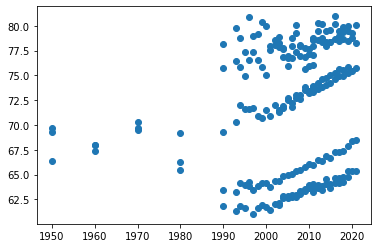

In [177]:
plt.scatter(df['year'], df['pct_married'])